In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from ucimlrepo import fetch_ucirepo
algerian_forest_fires = fetch_ucirepo(id=547)
algerian_forest_fires

{'data': {'ids': None,
  'features':              region  day  month  year  Temperature   RH   Ws  Rain   FFMC  \
  0            Bejaia    1      6  2012           29   57   18    0.0  65.7   
  1            Bejaia    2      6  2012           29   61   13    1.3  64.4   
  2            Bejaia    3      6  2012           26   82   22   13.1  47.1   
  3            Bejaia    4      6  2012           25   89   13    2.5  28.6   
  4            Bejaia    5      6  2012           27   77   16    0.0  64.8   
  ..              ...  ...    ...   ...          ...  ...  ...    ...   ...   
  239  Sidi-Bel Abbes   26      9  2012           30   65   14    0.0  85.4   
  240  Sidi-Bel Abbes   27      9  2012           28   87   15    4.4  41.1   
  241  Sidi-Bel Abbes   28      9  2012           27   87   29    0.5  45.9   
  242  Sidi-Bel Abbes   29      9  2012           24   54   18    0.1  79.7   
  243  Sidi-Bel Abbes   30      9  2012           24   64   15    0.2  67.3   
  
        DMC   

In [3]:
X = algerian_forest_fires.data.features
y = algerian_forest_fires.data.targets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.concat([X, y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5    RH          244 non-null    int64  
 6    Ws          244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    object 
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [6]:
df[df.isnull().any(axis=1)]

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,Sidi-Bel Abbes,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.reset_index(drop=True)

In [10]:
# fix spaces in columns names
df.columns = df.columns.str.strip()
df.columns

Index(['region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [11]:
df['Region'] = (df['region'] == 'Bejaia').astype(int)

In [12]:
df.drop(columns=['region'], inplace=True)

In [13]:
column = [feature for feature in df.columns if df[feature].dtypes == 'O' and not feature == 'Classes']

In [14]:
for i in column:
  df[i] = df[i].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [17]:
data_copy = df

In [18]:
data = data_copy.drop(columns=['day', 'month', 'year'])

In [19]:
data['Classes'] = data['Classes'].str.strip()
data['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [20]:
data['Classes'] = np.where(data['Classes'] == 'fire', 1, 0)

In [21]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

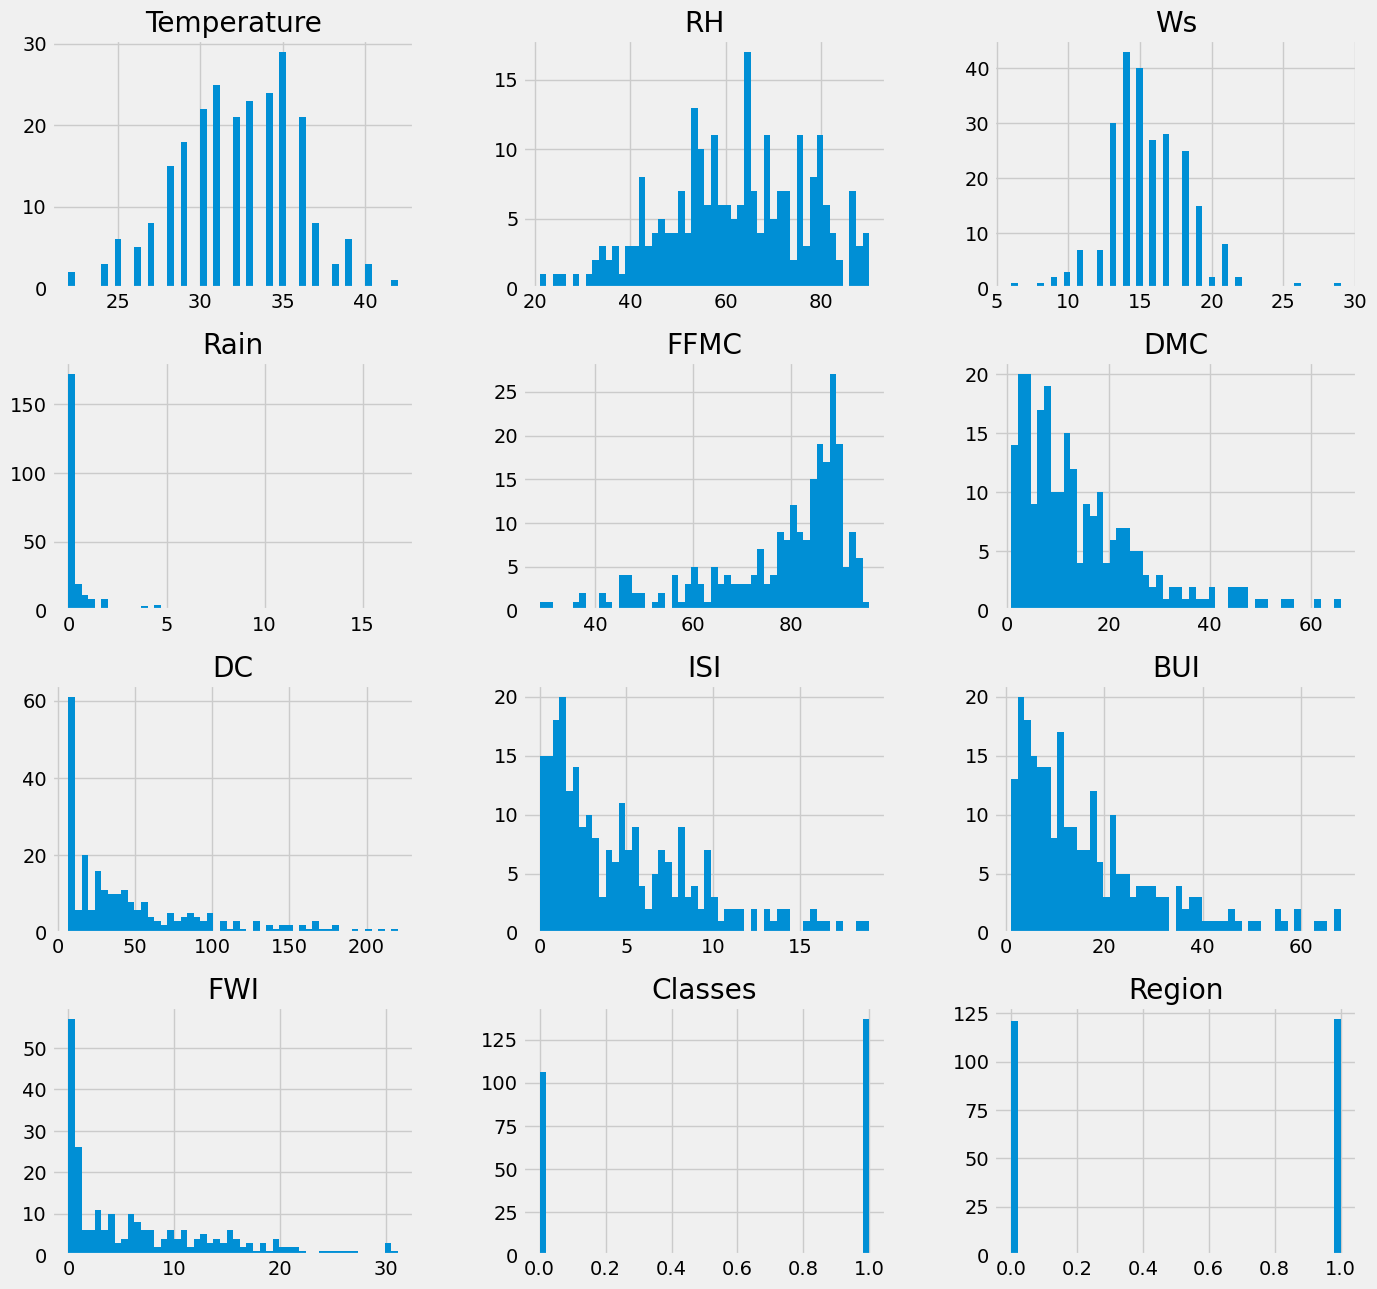

In [22]:
plt.style.use('fivethirtyeight')
data.hist(bins=50, figsize=(15, 15))
plt.show()

([<matplotlib.patches.Wedge at 0x181c94aa3c0>,
 [Text(-0.2189564657232264, 1.0779879712306597, '1'),
  Text(0.21895655996393085, -1.0779879520888727, '0')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

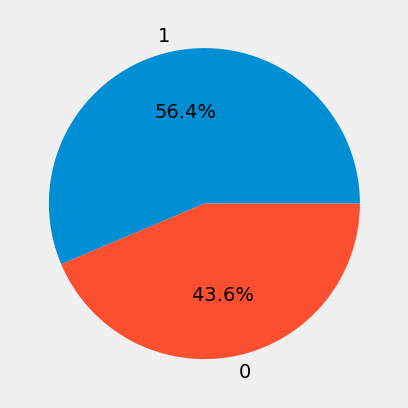

In [23]:
plt.pie(data['Classes'].value_counts(), labels=data['Classes'].value_counts().index, autopct='%1.1f%%')

In [24]:
# using Linear regration to predict FWI independent feature as (Temperature	RH	Ws	Rain	FFMC	DMC	DC	ISI	BUI)
X = data[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]

In [25]:
y = data['FWI']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression()

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
corr_column = correlation(X_train, 0.85)

In [31]:
X_train.drop(corr_column, inplace=True, axis=1)
X_test.drop(corr_column, inplace=True, axis=1)

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
LinearModel.fit(X_train, y_train)

LinearRegression()

In [34]:
LinearModel.predict(X_test)

array([ 7.68206801,  7.10377266,  0.11057938,  5.00453954,  6.84597949,
        2.00515513,  2.28151378,  7.5201292 ,  1.76416556,  3.08460302,
        0.45225625, 10.33915687,  9.42427599, 17.31480304, 18.10510208,
        1.79419075,  1.83144932, -0.45202853,  6.81679727,  2.96023394,
        1.75809025,  0.11836971,  5.86972723,  0.03895814, 21.49123842,
        4.99587542,  5.27944699,  9.2979525 , -0.65846871, 10.15123105,
        6.35125743, -0.09107437,  9.93439037, 14.12876707,  1.34279749,
        1.0789611 ,  1.46274642,  5.86562073,  0.0666134 ,  0.33033513,
        5.8400464 ,  1.62637517,  7.84853653, -0.63550264, 15.63070293,
        7.87894746,  8.73640901,  1.21303477, 13.28082279])

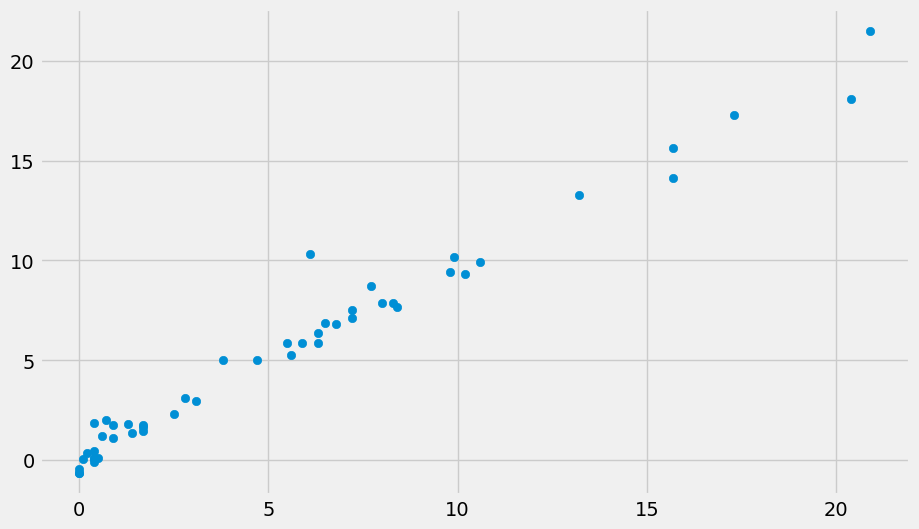

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, LinearModel.predict(X_test))

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [37]:
mse = mean_squared_error(y_test, LinearModel.predict(X_test))
mae = mean_absolute_error(y_test, LinearModel.predict(X_test))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, LinearModel.predict(X_test))

In [38]:
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R2: ', r2)

Mean Squared Error: 0.7875651833867751
Mean Absolute Error: 0.5373724919046503
Root Mean Squared Error: 0.887448693382764
R2:  0.9740149719239103


In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Mean Absolute Error: {mae_lasso}")
print(f"Lasso R2 Score: {r2_lasso}")

Lasso Mean Absolute Error: 1.0093958923873405
Lasso R2 Score: 0.9430507350726564


In [40]:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge.fit(X_train, y_train)
y_pred_Ridge = Ridge.predict(X_test)
mae_Ridge = mean_absolute_error(y_test, y_pred_Ridge)
r2_Ridge = r2_score(y_test, y_pred_Ridge)

print(f"Ridge Mean Absolute Error: {mae_Ridge}")
print(f"Ridge R2 Score: {r2_Ridge}")

Ridge Mean Absolute Error: 0.5499813436594879
Ridge R2 Score: 0.9731994541449994


In [41]:
from sklearn.linear_model import ElasticNet
ElasticNet = ElasticNet()
ElasticNet.fit(X_train, y_train)
y_pred_ElasticNet = ElasticNet.predict(X_test)
mae_ElasticNet = mean_absolute_error(y_test, y_pred_ElasticNet)
r2_ElasticNet = r2_score(y_test, y_pred_ElasticNet)

print(f"ElasticNet Mean Absolute Error: {mae_ElasticNet}")
print(f"ElasticNet R2 Score: {r2_ElasticNet}")

ElasticNet Mean Absolute Error: 1.7486802182012888
ElasticNet R2 Score: 0.8516595180446505


In [42]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv=3)
lassoCV.fit(X_train, y_train)
y_pred_lassoCV = lassoCV.predict(X_test)
mae_lassoCV = mean_absolute_error(y_test, y_pred_lassoCV)
r2_lassoCV = r2_score(y_test, y_pred_lassoCV)

print(f"Lasso Mean Absolute Error: {mae_lassoCV}")
print(f"Lasso R2 Score: {r2_lassoCV}")

Lasso Mean Absolute Error: 0.7598117690015567
Lasso R2 Score: 0.961037850635476


In [50]:
from sklearn.linear_model import RidgeCV
RidgeCV = RidgeCV(cv =3 )
RidgeCV.fit(X_train, y_train)
y_pred_RidgeCV = RidgeCV.predict(X_test)
mae_RidgeCV = mean_absolute_error(y_test, y_pred_RidgeCV)
r2_RidgeCV = r2_score(y_test, y_pred_RidgeCV)

print(f"RidgeCV Mean Absolute Error: {mae_RidgeCV}")
print(f"RidgeCV R2 Score: {r2_RidgeCV}")

RidgeCV Mean Absolute Error: 0.5499813436594879
RidgeCV R2 Score: 0.9731994541449994


In [44]:
from sklearn.linear_model import ElasticNetCV
ElasticNetCV = ElasticNetCV(cv=3)
ElasticNetCV.fit(X_train, y_train)
y_pred_ElasticNetCV = ElasticNetCV.predict(X_test)
mae_ElasticNetCV = mean_absolute_error(y_test, y_pred_ElasticNetCV)
r2_ElasticNetCV = r2_score(y_test, y_pred_ElasticNetCV)

print(f"ElasticNetCV Mean Absolute Error: {mae_ElasticNetCV}")
print(f"ElasticNetCV R2 Score: {r2_ElasticNetCV}")

ElasticNetCV Mean Absolute Error: 0.6321625159306292
ElasticNetCV R2 Score: 0.9683878598256709


In [51]:
RidgeCV

RidgeCV(cv=3)

In [52]:
scaler

StandardScaler()

In [53]:
import pickle 

In [55]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(RidgeCV, open('ridge.pkl', 'wb'))